<a href="https://colab.research.google.com/github/JNeerajsai/Epics-Project/blob/main/Epics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

import io
from PIL import Image
from tqdm import tqdm
from keras import layers

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import ipywidgets as widgets
from IPython.display import display, clear_output
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, History  # Import History here
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

history = History()  # Initialize History object


In [ ]:
pip install tensorflow

In [ ]:
pip install keras


In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

In [ ]:
!ls "/content/drive/My Drive/"

'218w1a1282 (11).docx'
'A-2 Q LIST.gdoc'
'AI Assignment I Q lists 23-24 (1).gdoc'
'AI Assignment I Q lists 23-24.gdoc'
'AI _CBCS_ Home AssignmentS final (1).gdoc'
'AI _CBCS_ Home AssignmentS final (2).gdoc'
'AI _CBCS_ Home AssignmentS final.gdoc'
'Basian Belief Network problem solution.gdoc'
 Brain_Tumor_DataSet_2019
'CHATBOT ELEMENTS.gdoc'
 Classroom
'Colab Notebooks'
'Copy of NEERAJ.pdf'
'ethical hack2.pdf'
'ethical hack.pdf'
'Files (1).zip'
 Fundus_Train_Val_Data
'honours 1 mark sessional -1 (1).docx'
'honours 1 mark sessional -1.docx'
 IMG-20221125-WA0005.jpg
 IMG-20221125-WA0010.jpg
'IT CS Lab External 2018 - 19 c.xlsx'
'Jasthi Neeraj sai(218W1A1282).pdf'
'J Neeraj sai(colour).pdf'
'J Neeraj Sai_copy.pdf'
 naive-algorithm.py
'Neeraj saiJasthi-C Programming-certificate.pdf'
'PROBABILITY BASIC PROBLEM AND WITH SOLUTION TASK1.gdoc'
'Professional profile.gslides'
'Requirements engineering(SRS).gdoc'
'Resume2 (1).pdf'
'Resume (2).pdf'
 Screenshot_20230407-145016.png
'unit 2 OF SE (1).g

In [ ]:
train_path = "/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train"
test_path = "/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation"
valid_path = "/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation"

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes =['Glaucoma_Negative','Glaucoma_Positive'], batch_size=32)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes =['Glaucoma_Negative','Glaucoma_Positive',], batch_size=32)

Found 530 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                         title = 'Confusion Matrix',
                         cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")

  print(cm)

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
            horizontalalignment ="center",
            color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

keras.src.engine.functional.Functional

In [ ]:
classifier = Sequential()
for layer in vgg16_model.layers[:-1]:
    classifier.add(layer)

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
for layer in classifier.layers:
    layer.trainable = False

In [ ]:
classifier.add(Dense(3, activation='softmax'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
classifier.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 530 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
labels = [ 'Glaucoma_Negative', 'Glaucoma_Positive']
X_train, y_train, X_test, y_test  = [],[],[],[]

In [ ]:
batch_size = 32
model_info = classifier.fit(
    training_set,
    steps_per_epoch=int(455/batch_size),
    epochs=30,
    validation_data=test_set,
    validation_steps=int(113/batch_size),
)


Epoch 1/30
14/14 [==============================] - 76s 5s/step - loss: 1.3213 - accuracy: 0.5714 - val_loss: 0.6227 - val_accuracy: 0.7188
Epoch 2/30
14/14 [==============================] - 70s 5s/step - loss: 0.6076 - accuracy: 0.7321 - val_loss: 0.5597 - val_accuracy: 0.7604
Epoch 3/30
14/14 [==============================] - 69s 5s/step - loss: 0.5835 - accuracy: 0.7350 - val_loss: 0.6024 - val_accuracy: 0.7292
Epoch 4/30
14/14 [==============================] - 68s 5s/step - loss: 0.5843 - accuracy: 0.7304 - val_loss: 0.6481 - val_accuracy: 0.6875
Epoch 5/30
14/14 [==============================] - 70s 5s/step - loss: 0.5665 - accuracy: 0.7396 - val_loss: 0.5529 - val_accuracy: 0.7812
Epoch 6/30
14/14 [==============================] - 70s 5s/step - loss: 0.5556 - accuracy: 0.7488 - val_loss: 0.5925 - val_accuracy: 0.7396
Epoch 7/30
14/14 [==============================] - 74s 5s/step - loss: 0.5484 - accuracy: 0.7512 - val_loss: 0.5872 - val_accuracy: 0.7500
Epoch 8/30
14/14 [==

In [ ]:
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None):
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8)
    if(ims.shape[-1] != 3):
      ims = ims.transpose ((0,2,3,1))
  f = plt.figure(figsize = figsize)
  cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
  for i in range(len(ims)):
    sp = f.add_subplot (rows, cols, i+1)
    sp.axis('Off')
    if titles is not None:
      sp.set_title(titles[i], fontsize =10)
    plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
test_batches_fine = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes =['Glaucoma_Negative','Glaucoma_Positive'], batch_size=50)

Found 130 images belonging to 2 classes.


In [ ]:
test_imgs, test_labels = next(test_batches_fine)

[0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


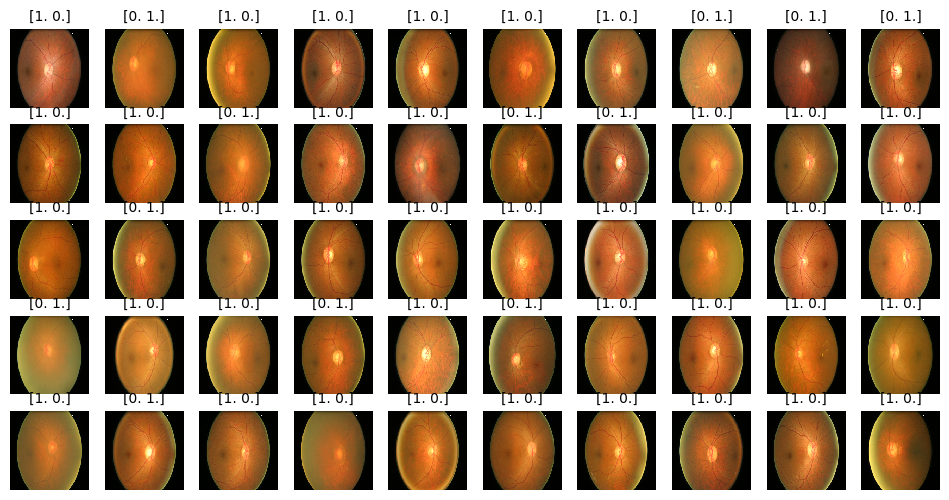

In [ ]:

x_labels = test_labels.argmax(axis=1)
print(x_labels)
plots(test_imgs, titles=test_labels)

In [ ]:
x_labels

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
predictions = classifier.predict_generator(test_batches_fine, steps=1, verbose=0)

<ipython-input-26-edfb990aea01>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = classifier.predict_generator(test_batches_fine, steps=1, verbose=0)


InvalidArgumentError: ignored

In [ ]:
y_labels = predictions.argmax(axis=1)
y_labels

NameError: ignored

In [ ]:
cm = confusion_matrix(x_labels, y_labels)

In [ ]:
cm_plot_labels = ['Normal','Glaucoma']

Confusion Matrix without normalization
[[ 0 40]
 [ 0 10]]


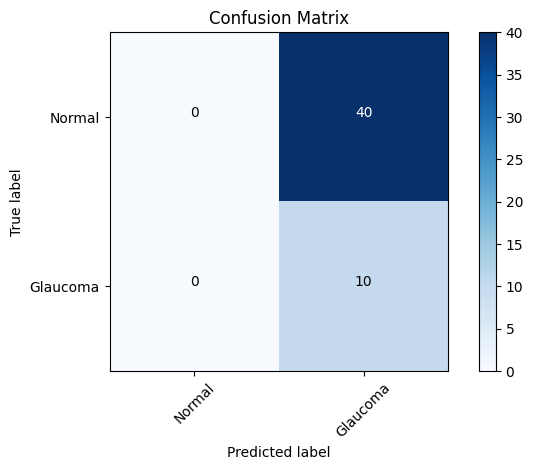

In [ ]:
plot_confusion_matrix(cm, cm_plot_labels, title ='Confusion Matrix')

In [ ]:
print(model_info.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


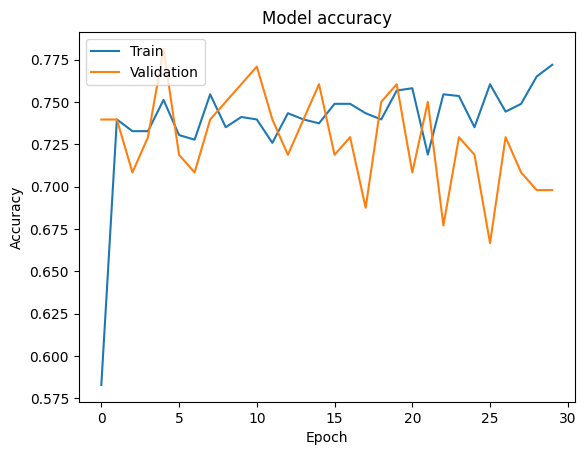

In [ ]:
# Check available keys
print(model_info.history.keys())

# Adjust plotting based on available keys
plt.plot(model_info.history['accuracy'])  # or 'acc' based on the available keys
plt.plot(model_info.history['val_accuracy'])  # or 'val_acc' based on the available keys
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


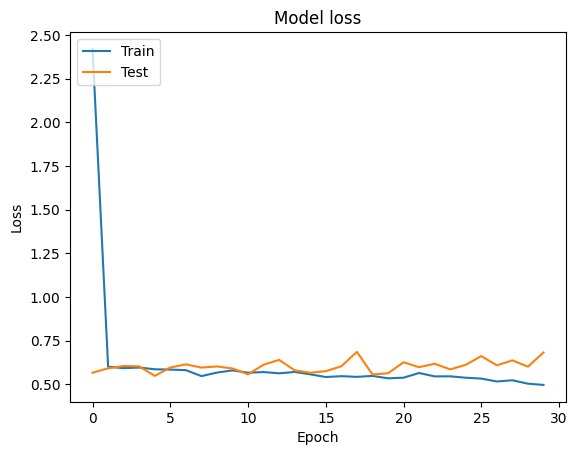

In [ ]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
train_accuracy = classifier.evaluate(training_set)
print(f"Training set accuracy: {train_accuracy[1] * 100:.2f}%")

**Resnet**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

import io
from PIL import Image
from tqdm import tqdm
from keras import layers

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = [ 'Glaucoma_Negative', 'Glaucoma_Positive']
X_train, y_train, X_test, y_test  = [],[],[],[]

In [ ]:
image_size = 64
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train', i)
    print("Folder path : ", folderPath, "\n\n")
    print("Folder List : ", os.listdir(folderPath), "\n\n")
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
    print("\n\n")

Folder path :  /content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative 


Folder List :  ['001 (1).jpg', '002 (1).jpg', '001.jpg', '003 (1).jpg', '002.jpg', '003.jpg', '004 (1).jpg', '004.jpg', '006 (1).jpg', '005 (1).jpg', '005.jpg', '006.jpg', '009.jpg', '007.jpg', '008.jpg', '012.jpg', '011.jpg', '010.jpg', '014.jpg', '013.jpg', '015.jpg', '017.jpg', '016.jpg', '020.jpg', '018.jpg', '019.jpg', '023.jpg', '021.jpg', '022.jpg', '026.jpg', '025.jpg', '024.jpg', '027.jpg', '029.jpg', '028.jpg', '032.jpg', '030.jpg', '031.jpg', '035.jpg', '034.jpg', '033.jpg', '038.jpg', '040.jpg', '039.jpg', '043.jpg', '042.jpg', '044.jpg', '045.jpg', '046.jpg', '049.jpg', '048.jpg', '047.jpg', '052.jpg', '051.jpg', '053.jpg', '055.jpg', '056.jpg', '054.jpg', '059.jpg', '057.jpg', '058.jpg', '061.jpg', '060.jpg', '062.jpg', '063.jpg', '064.jpg', '067.jpg', '065.jpg', '066.jpg', '068.jpg', '070.jpg', '071.jpg', '073.jpg', '075.jpg', '074.jpg', '078.jpg', '079.jpg', '077.

100%|██████████| 392/392 [00:47<00:00,  8.19it/s]





Folder path :  /content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive 


Folder List :  ['036.jpg', '037.jpg', '041.jpg', '069.jpg', '050.jpg', '072.jpg', '086.jpg', '087.jpg', '076.jpg', '097.jpg', '094.jpg', '093.jpg', '138.jpg', '110.jpg', '116.jpg', '158.jpg', '160.jpg', '159.jpg', '168.jpg', '171.jpg', '165.jpg', '182.jpg', '181.jpg', '180.jpg', '213.jpg', '225.jpg', '208.jpg', '229.jpg', '228.jpg', '233.jpg', '241.jpg', '240.jpg', '245.jpg', '246.jpg', '247.jpg', '269.jpg', '273.jpg', '270.jpg', '278.jpg', '283.jpg', '277.jpg', '284.jpg', '286.jpg', '285.jpg', '289.jpg', '294.jpg', '293.jpg', '300.jpg', '301.jpg', '304.jpg', '305.jpg', '312.jpg', '306.jpg', '317.jpg', '327.jpg', '322.jpg', '330.jpg', '336.jpg', '345.jpg', '337.jpg', '340.jpg', '348.jpg', '349.jpg', '353.jpg', '359.jpg', '362.jpg', '354.jpg', '381.jpg', '366.jpg', '377.jpg', '385.jpg', '383.jpg', '382.jpg', '390.jpg', '389.jpg', '386.jpg', '402.jpg', '395.jpg', '398.jpg', '407

100%|██████████| 138/138 [00:17<00:00,  7.78it/s]

In [ ]:
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation', i)
    print("Folder path : ", folderPath, "\n\n")
    print("Folder List : ", os.listdir(folderPath), "\n\n")
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_test.append(img)
        y_test.append(i)
    print("\n\n")

Folder path :  /content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/Glaucoma_Negative 


Folder List :  ['485.jpg', '483.jpg', '484.jpg', '487.jpg', '489.jpg', '488.jpg', '492.jpg', '491.jpg', '493.jpg', '494.jpg', '497.jpg', '495.jpg', '498.jpg', '499.jpg', '501.jpg', '502.jpg', '500.jpg', '504.jpg', '503.jpg', '509.jpg', '513.jpg', '517.jpg', '510.jpg', '520.jpg', '521.jpg', '518.jpg', '525.jpg', '526.jpg', '522.jpg', '530.jpg', '529.jpg', '527.jpg', '535.jpg', '534.jpg', '531.jpg', '538.jpg', '537.jpg', '536.jpg', '540.jpg', '539.jpg', '541.jpg', '543.jpg', '542.jpg', '544.jpg', '547.jpg', '546.jpg', '551.jpg', '552.jpg', '548.jpg', '554.jpg', '553.jpg', '555.jpg', '559.jpg', '562.jpg', '561.jpg', '565.jpg', '563.jpg', '564.jpg', '568.jpg', '566.jpg', '567.jpg', '569.jpg', '570.jpg', '573.jpg', '575.jpg', '576.jpg', '574.jpg', '579.jpg', '581.jpg', '577.jpg', '585.jpg', '587.jpg', '583.jpg', '596.jpg', '590.jpg', '594.jpg', '597.jpg', '599.jpg', '602.jpg', '6

100%|██████████| 96/96 [00:38<00:00,  2.52it/s]





Folder path :  /content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/Glaucoma_Positive 


Folder List :  ['601.jpg', '600.jpg', '598.jpg', '605.jpg', '604.jpg', '608.jpg', '613.jpg', '609.jpg', '612.jpg', '615.jpg', '618.jpg', '617.jpg', '619.jpg', '621.jpg', '622.jpg', '623.jpg', '624.jpg', '626.jpg', '627.jpg', '628.jpg', '631.jpg', '632.jpg', '630.jpg', '638.jpg', '634.jpg', '636.jpg', '644.jpg', '640.jpg', '641.jpg', '645.jpg', '646.jpg', '647.jpg', '648.jpg', '650.jpg'] 




100%|██████████| 34/34 [00:13<00:00,  2.45it/s]

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])